In [14]:
import sys
import matplotlib
sys.path.append('../../../experiments/')
from interleavesound import *
sys.path.append('../../../experiment_prototype/decimation_scheme/')
from decimation_scheme import *

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
sys.path.append('../filter_tools/')
from filter_tools import plot_filter_response

In [51]:
scheme = decimate_10MHz_scheme()
print(scheme.rxrate)
s_per_samples = [1.0/stage.input_rate for stage in scheme.stages]
num_taps = [len(stage.filter_taps) for stage in scheme.stages]
print('Num taps per stage: {}'.format(num_taps))
min_tap_value = [min(stage.filter_taps) for stage in scheme.stages]
print('Min tap: {}'.format(min_tap_value))
filter_times = [num * s_per_sample for num, s_per_sample in zip(num_taps, s_per_samples)]
print('Filter times in seconds (should be less than 300 us preferably):\n {}'.format(filter_times))

10000000.0
Num taps per stage: [661, 102, 27, 2]
Min tap: [-7.680872926157198e-06, -0.1539065144113525, -3.0858307966571203, 50.0]
Filter times in seconds (should be less than 300 us preferably):
 [6.61e-05, 0.000204, 0.00027, 0.00011999999999999999]


In [45]:
default_scheme = create_default_scheme()
print(default_scheme.rxrate)
s_per_samples = [1.0/stage.input_rate for stage in default_scheme.stages]
num_taps = [len(stage.filter_taps) for stage in default_scheme.stages]
print('Num taps per stage: {}'.format(num_taps))
min_tap_value = [min(stage.filter_taps) for stage in default_scheme.stages]
print('Min tap: {}'.format(min_tap_value))
filter_times = [num * s_per_sample for num, s_per_sample in zip(num_taps, s_per_samples)]
print('Filter times in seconds (should be less than 300 us preferably):\n {}'.format(filter_times))

5000000.0
Num taps per stage: [661, 127, 27, 4]
Min tap: [-0.0025025561317611146, -0.27878555298025537, -3.0858307966571203, 5.647100088816628]
Filter times in seconds (should be less than 300 us preferably):
 [0.0001322, 0.000254, 0.00027, 0.00023999999999999998]


../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


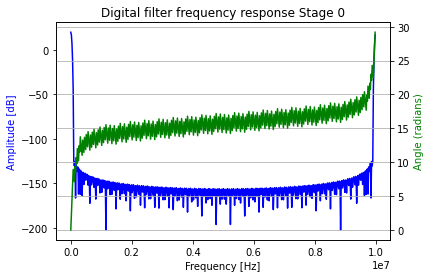

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


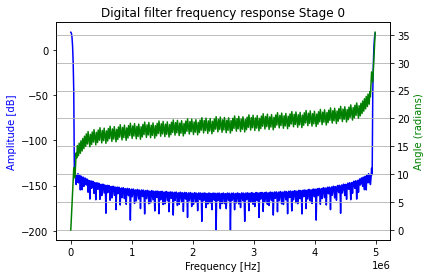

In [46]:
plot_filter_response(scheme.stages[0].filter_taps, 'Stage 0', scheme.rxrate)
plot_filter_response(default_scheme.stages[0].filter_taps, 'Stage 0', default_scheme.rxrate)

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
../filter_tools/filter_tools.py:140: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


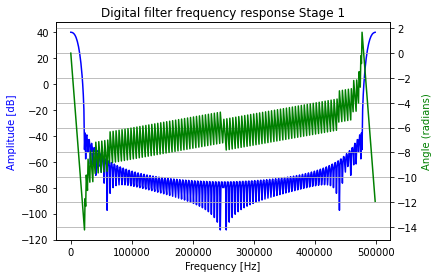

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


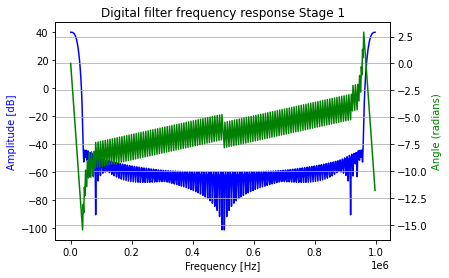

In [48]:
plot_filter_response(scheme.stages[1].filter_taps, 'Stage 1', scheme.rxrate/scheme.stages[0].dm_rate)
plot_filter_response(default_scheme.stages[1].filter_taps, 'Stage 1', default_scheme.rxrate/default_scheme.stages[1].dm_rate)

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


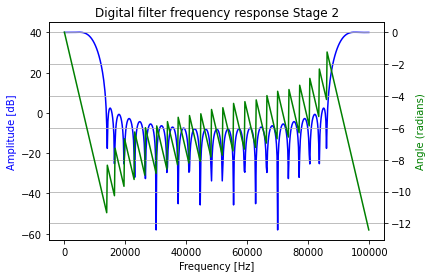

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


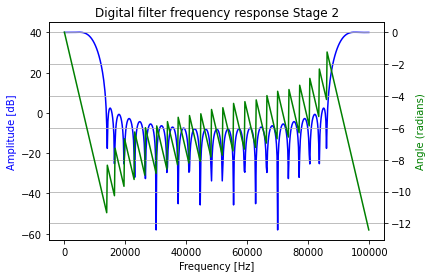

In [49]:
plot_filter_response(scheme.stages[2].filter_taps, 'Stage 2', scheme.rxrate/scheme.stages[0].dm_rate/scheme.stages[1].dm_rate)
plot_filter_response(default_scheme.stages[2].filter_taps, 'Stage 2', default_scheme.rxrate/default_scheme.stages[0].dm_rate/default_scheme.stages[1].dm_rate)

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
../filter_tools/filter_tools.py:140: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


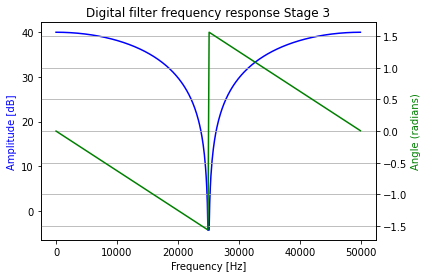

../filter_tools/filter_tools.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
../filter_tools/filter_tools.py:140: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


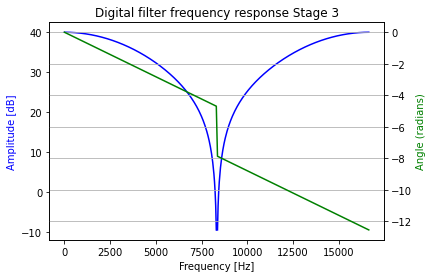

In [50]:
plot_filter_response(scheme.stages[3].filter_taps, 'Stage 3', scheme.rxrate/scheme.stages[0].dm_rate/scheme.stages[1].dm_rate/scheme.stages[2].dm_rate)
plot_filter_response(default_scheme.stages[3].filter_taps, 'Stage 3', default_scheme.rxrate/default_scheme.stages[0].dm_rate/default_scheme.stages[1].dm_rate/default_scheme.stages[2].dm_rate)